# Linear SVM

In [52]:
import numpy as np
import matplotlib.pyplot as plt

# def generate_random_data(x0, y0, spread, n):
def generate_random_data(x0: float, y0: float, spread: float, n: int) -> np.array:
    """
    Generates a cluster of random data points around a given center.

    Parameters:
    - x0: x-coordinate of the center.
    - y0: y-coordinate of the center.
    - spread: spread factor around the center.
    - n: number of data points to generate.

    Returns:
    Tuple of two lists:
    1. List of x-coordinates of the generated data points.
    2. List of y-coordinates of the generated data points.
    """
    x_vals = []
    y_vals = []
        
    rand_vals = np.random.rand(2, n)
    
    for j in range(n):
        x_vals.append(x0 + 2*spread*rand_vals[0,j] - spread)
        y_vals.append(y0 + 2*spread*rand_vals[1,j] - spread)
    
    return [x_vals, y_vals]
    

In [53]:
def plot_cluster_graph(red_points: np.array, blue_points: np.array, xy_lim: tuple[float, float]) -> None:
    '''
    Plots a graph with two distinct clusters given the specified parameters.
    
    Parameters:
    - red_points: numpy array of coordinates of the red points.
    - blue_points: numpy array of coordinates of the blue points.
    - xy_lim: range of values for both the x-axis and y-axis in the plot.
    '''
    plt.figure(figsize=(5,5))
    plt.xlim(xy_lim)
    plt.ylim(xy_lim)
    plt.plot(red_points[0], red_points[1], 'ro')
    plt.plot(blue_points[0], blue_points[1], 'bo')
    plt.grid()

In [54]:
# this cell contains parameters to be used in the following test plots
default_xy_lim = (-1.0, 2.0)
small_spread = 0.2
large_spread = 1.0
red_centre = (0, 1)
blue_centre = (1, 0)
n = 20

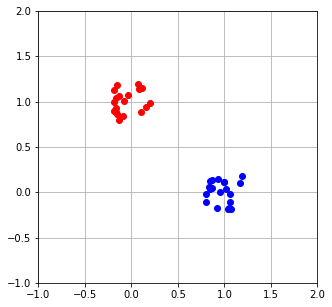

In [55]:
# use this cell for your first plot, where the spread should be small
red_points = generate_random_data(*red_centre, small_spread, n)
blue_points = generate_random_data(*blue_centre, small_spread, n)

plot_cluster_graph(red_points, blue_points, default_xy_lim)
plt.show()

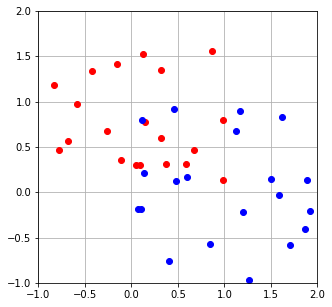

In [56]:
# use this cell for your second plot, where the spread is larger
red_points = generate_random_data(*red_centre, large_spread, n)
blue_points = generate_random_data(*blue_centre, large_spread, n)

plot_cluster_graph(red_points, blue_points, default_xy_lim)
plt.show()

In [57]:
def loss(bw: np.array, data: tuple[np.array, np.array]) -> float:
    '''
    Computes the hinge loss for the SVM given the bias, the weights and the training data.

    Parameters:
    - bw: a numpy array comprising a bias term followed by weights.
    - data: a tuple containing two numpy arrays:
     1. The feature matrix 'X' (an array of datapoints).
     2. The corresponding target values 'y' (a classification as 1 or -1).

    Returns: the calculated total hinge loss.
    '''
    b = bw[0]
    w = bw[1:]

    l = 0.01
    regularisation_term = l * np.sum(w**2)  # λ ||w||^2
    
    X = data[:, :-1]
    y = data[:, -1]

    hinge_losses = []
    for i in range(len(X)):
        hinge_loss = max(0, 1 - y[i] * (np.dot(w, X[i]) - b))
        hinge_losses.append(hinge_loss)

    total_loss = regularisation_term + (1 / len(data)) * sum(hinge_losses)
    return total_loss

In [58]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

In [59]:
def f(bw, data):
    return 2 + (bw[0] - data[0]) ** 2 + (bw[1] - data[1]) ** 2

testdata = np.array([1, 2])

In [60]:
def svm_demo(n: int, redCentre: tuple[float, float], blueCentre: tuple[float, float], spread: float) -> None:
    '''
    Minimises the loss function for the SVM, then plots the resulting hyperplane separating between the red and blue points.

    Parameters:
    - n: number of points to plot per cluster.
    - redCentre: the coordinates of the centre of the cluster of red points.
    - blueCentre: the coordinates of the centre of the cluster of blue points.
    - spread: the spread factor for both clusters.
    '''
    red_data = np.array(generate_random_data(*redCentre, spread, n))
    blue_data = np.array(generate_random_data(*blueCentre, spread, n))
    xy_lim = (-1.5, 2.5)

    # Labels for red and blue data points
    y_red = np.ones(n)
    y_blue = -np.ones(n)

    # Combine the red and blue data points into a single dataset
    X = np.vstack((red_data.T, blue_data.T))
    y = np.concatenate((y_red, y_blue))

    # Stack features and labels to prepare for SVM
    data = np.column_stack((X, y))

    def loss_wrapper(bw):
        return loss(bw, data)

    # Initialise and perform optimisation to find the best weights and bias
    initial_guess = np.zeros(X.shape[1] + 1)
    result = minimize(loss_wrapper, initial_guess)

    # Extract the optimal weights and bias from the result
    w_opt = result.x[1:]
    b_opt = result.x[0]

    # Plot the red and blue data points
    plot_cluster_graph(red_data, blue_data, xy_lim)

    # Generate values for plotting the hyperplane and margins
    x_values = np.linspace(*xy_lim, 100)
    y_decision = (b_opt - w_opt[0] * x_values) / w_opt[1]
    y_margin_1 = (b_opt - 1 - w_opt[0] * x_values) / w_opt[1]
    y_margin_2 = (b_opt + 1 - w_opt[0] * x_values) / w_opt[1]

    # Plot hyperplane and margins
    plt.plot(x_values, y_decision, 'k-', label='Hyperplane', zorder=3)
    plt.plot(x_values, y_margin_1, 'k--', label='Margin', zorder=3)
    plt.plot(x_values, y_margin_2, 'k--', zorder=3)    
    plt.legend()
    plt.show()


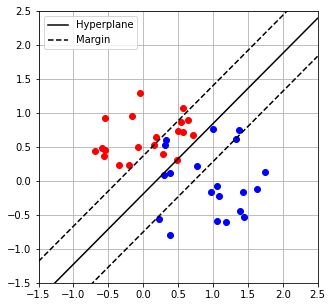

In [61]:
# call your svm_demo function here
svm_demo(20, [0, 1], [1, 0], 0.8)

# Kernelised SVM

------------------------------------ A NEW BEGINNING! ------------------------------------\
Here we start our project on extending the above code's functionality.

We begin with the aim to implement an SVM from scratch, focusing on understanding and implementing the kernel trick from scratch, particularly the polynomial kernel.

The goal is to handle non-linearly separable data by transforming it into a higher-dimensional space where it becomes linearly separable.

This aim is our starting point, at least.

Here is a proposed step-by-step appraoch to achieving the above goal, similar in structure to how the linear SVM project was approached.

1. Kernel Function Implementation
    - Implement a basic linear kernel function
    - Implement a polynomial kernel function
    - (Optional) Implement a Gaussian (RBF) kernel function

2. Kernel Matrix Computation
    -  Create a function to compute the kernel matrix for a given dataset and kernel function

3. Dual Form SVM Formulation
    - Implement the dual form of the SVM optimisation problem
    - Modify the loss function to use the kernel matrix

4. Quadratic Programming Solver
    - Implement from scratch a quadratic programming solver to find the optimal Lagrange multipliers e.g. a simple solver like SMO or gradient ascent for the dual problem

5. Support Vector Identification
    - Implement a method to identify support vectors based on the solved Lagrange multipliers

6. Decision Function
    - Implement the SVM decision function using the kernel trick

7. Non-linear Data Generation
    - Create functions to generate non-linearly separable datasets for testing

8. Training and Prediction
    - Implement functions for training the SVM and making predictions on new data

9. Visualisation
    - Extend the current visualisation code to plot decision boundaries for non-linear SVMs

10. Hyperparameter Tuning
    - Implement methods for tuning kernel parameters (e.g., degree for polynomial kernel)

11. Performance Evaluation
    - Implement metrics to evaluate the SVM's performance on various datasets

12. Comparison with Linear SVM
    - Create experiments to compare the performance of kernelised SVM with linear SVM

## Data Generation

In [62]:
def generate_circular_data(radius: float, spread: float, n: int) -> np.array:
    """
    Generates circular clusters of random data points.

    Parameters:
    - radius: radius of the circular cluster.
    - spread: spread factor around the circle.
    - n: number of data points to generate for each cluster.

    Returns:
    - A tuple of two numpy arrays: one for the x-coordinates and one for the y-coordinates.
    """
    angles = 2 * np.pi * np.random.rand(n)
    x_vals = radius * np.cos(angles) + spread * np.random.randn(n)
    y_vals = radius * np.sin(angles) + spread * np.random.randn(n)
    return np.array([x_vals, y_vals])

In [63]:
def plot_clusters(inner_points: np.array, outer_points: np.array, xy_lim: tuple[float, float]) -> None:
    """
    Plots a graph with two circular clusters.

    Parameters:
    - inner_points: numpy array of coordinates of the inner circular cluster.
    - outer_points: numpy array of coordinates of the outer circular cluster.
    - xy_lim: range of values for both the x-axis and y-axis in the plot.
    """
    plt.figure(figsize=(5,5))
    plt.xlim(xy_lim)
    plt.ylim(xy_lim)
    plt.plot(inner_points[0], inner_points[1], 'ro', label='Inner Cluster')
    plt.plot(outer_points[0], outer_points[1], 'bo', label='Outer Cluster')
    plt.grid()
    plt.legend()
    plt.show()

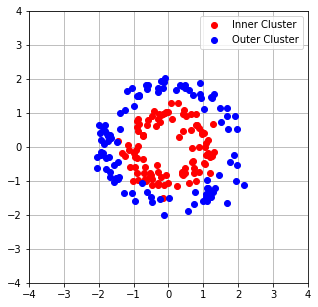

In [64]:
n = 100
inner_radius = 1.0
outer_radius = 1.8
spread = 0.2
xy_lim = (-4, 4)

inner_points = generate_circular_data(inner_radius, spread, n)
outer_points = generate_circular_data(outer_radius, spread, n)

plot_clusters(inner_points, outer_points, xy_lim)

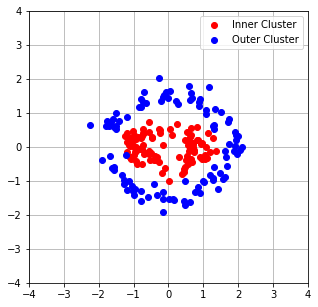

In [74]:
import numpy as np
import matplotlib.pyplot as plt

def generate_elliptical_data(a: float, b: float, spread: float, n: int) -> np.array:
    """
    Generates elliptical clusters of random data points.

    Parameters:
    - a: semi-major axis of the ellipse.
    - b: semi-minor axis of the ellipse.
    - spread: spread factor around the ellipse.
    - n: number of data points to generate for each cluster.

    Returns:
    - A tuple of two numpy arrays: one for the x-coordinates and one for the y-coordinates.
    """
    angles = 2 * np.pi * np.random.rand(n)
    x_vals = a * np.cos(angles) + spread * np.random.randn(n)
    y_vals = b * np.sin(angles) + spread * np.random.randn(n)
    return np.array([x_vals, y_vals])

n = 100
a_inner = 1.0
b_inner = 0.5
a_outer = 1.8
b_outer = 1.5
spread = 0.2
xy_lim = (-4, 4)

inner_points = generate_elliptical_data(a_inner, b_inner, spread, n)
outer_points = generate_elliptical_data(a_outer, b_outer, spread, n)

plot_clusters(inner_points, outer_points, xy_lim)


## Implementation of Support Vector Machine

In [66]:
import numpy as np
import matplotlib.pyplot as plt
import cvxopt

def linear_kernel(x1, x2):
    return np.dot(x1, x2)

def polynomial_kernel(x1, x2, degree=3, coef0=1):
    return (np.dot(x1, x2) + coef0) ** degree

def gaussian_rbf_kernel(x1, x2, sigma=1.0):
    gamma = 1.0 / (2 * sigma**2)
    return np.exp(-gamma * np.linalg.norm(x1 - x2)**2)


In [67]:
def solve_qp(P, q, G, h, A, b):
    """
    Solves the quadratic programming problem for SVM.

    Parameters:
    - P, q, G, h, A, b: parameters of the quadratic programming problem.

    Returns: the optimal values for the decision variables.
    """
    P = cvxopt.matrix(P)
    q = cvxopt.matrix(q)
    G = cvxopt.matrix(G)
    h = cvxopt.matrix(h)
    A = cvxopt.matrix(A)
    b = cvxopt.matrix(b)
    solution = cvxopt.solvers.qp(P, q, G, h, A, b)
    return np.ravel(solution['x'])

In [68]:
class SVM:
    def __init__(self, kernel=linear_kernel, C=1.0):
        """
        Initialises the SVM with a specified kernel function and regularisation parameter.

        Parameters:
        - kernel: a kernel function (default is linear kernel).
        - C: regularisation parameter (default is 1.0).
        """
        self.kernel = kernel
        self.C = C
        self.alpha = None
        self.b = 0
        self.support_vectors = None
        self.support_vector_labels = None
        self.support_vector_alphas = None

    def fit(self, X, y):
        """
        Trains the SVM model on the provided training data.

        Parameters:
        - X: training data features, a numpy array of shape (n_samples, n_features).
        - y: training data labels, a numpy array of shape (n_samples,).
        """
        n_samples, n_features = X.shape
        K = np.zeros((n_samples, n_samples))

        # Compute the kernel matrix
        for i in range(n_samples):
            for j in range(n_samples):
                K[i, j] = self.kernel(X[i], X[j])

        # Construct the parameters for the quadratic programming problem
        P = np.outer(y, y) * K
        q = -np.ones(n_samples)
        G = np.vstack((-np.eye(n_samples), np.eye(n_samples)))
        h = np.hstack((np.zeros(n_samples), self.C * np.ones(n_samples)))
        A = y.reshape(1, -1)
        b = np.zeros(1)

        # Solve the quadratic programming problem to find the optimal alpha values
        self.alpha = solve_qp(P, q, G, h, A, b)

        # Identify support vectors
        support_vector_indices = self.alpha > 1e-5
        self.alpha = self.alpha[support_vector_indices]
        self.support_vectors = X[support_vector_indices]
        self.support_vector_labels = y[support_vector_indices]
        self.support_vector_alphas = self.alpha

        # Compute the bias term
        self.b = np.mean(
            [y_k - np.sum(self.alpha * self.support_vector_labels * K[i, support_vector_indices])
             for i, y_k in enumerate(y) if support_vector_indices[i]]
        )

    def predict(self, X):
        """
        Predicts the class labels for the given data.

        Parameters:
        - X: numpy array of shape (n_samples, n_features) representing the input data for which the class labels are to be predicted.

        Returns: y_pred, a numpy array of shape (n_samples,) containing the predicted class labels for the input data.
        """
        y_pred = []
        for i in range(len(X)):
            prediction = np.sum(
                self.alpha * self.support_vector_labels *
                np.array([self.kernel(sv, X[i]) for sv in self.support_vectors])
            ) + self.b
            y_pred.append(np.sign(prediction))
        return np.array(y_pred)

## Training and Visualisation

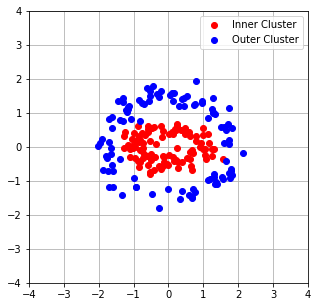

In [75]:
def plot_decision_boundary(svm, X, y, xy_lim):
    xx, yy = np.meshgrid(np.linspace(xy_lim[0], xy_lim[1], 500),
                         np.linspace(xy_lim[0], xy_lim[1], 500))
    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = svm.predict(grid).reshape(xx.shape)

    plt.figure(figsize=(5, 5))
    plt.grid(True)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', zorder=2)
    plt.xlim(xy_lim)
    plt.ylim(xy_lim)
    plt.contour(xx, yy, Z, levels=[0], colors='k', linestyles='--', zorder=1)
    plt.show()

n = 100
a_inner = 1.0
b_inner = 0.5
a_outer = 1.8
b_outer = 1.5
spread = 0.2
xy_lim = (-4, 4)

inner_points = generate_elliptical_data(a_inner, b_inner, spread, n)
outer_points = generate_elliptical_data(a_outer, b_outer, spread, n)

X_inner = inner_points.T
X_outer = outer_points.T

X = np.vstack((X_inner, X_outer))
y_inner = np.ones(n)
y_outer = -np.ones(n)
y = np.hstack((y_inner, y_outer))

plot_clusters(inner_points, outer_points, xy_lim)

     pcost       dcost       gap    pres   dres
 0: -3.4728e+01 -4.8648e+02  3e+03  3e+00  4e-14
 1: -1.9700e+01 -3.0134e+02  6e+02  4e-01  3e-14
 2: -8.4182e+00 -8.1900e+01  1e+02  7e-02  2e-14
 3: -6.2126e+00 -3.2119e+01  4e+01  2e-02  1e-14
 4: -6.8359e+00 -1.3255e+01  8e+00  4e-03  1e-14
 5: -7.4665e+00 -1.0215e+01  3e+00  1e-03  1e-14
 6: -7.7104e+00 -9.4762e+00  2e+00  4e-04  1e-14
 7: -8.1793e+00 -8.5435e+00  4e-01  9e-05  1e-14
 8: -8.2832e+00 -8.3349e+00  5e-02  9e-06  2e-14
 9: -8.3016e+00 -8.3052e+00  4e-03  6e-07  1e-14
10: -8.3030e+00 -8.3030e+00  7e-05  9e-09  1e-14
11: -8.3030e+00 -8.3030e+00  7e-07  9e-11  1e-14
Optimal solution found.


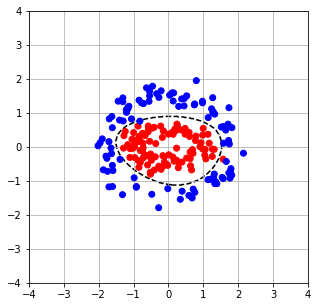

In [76]:
# Train SVM with any kernel you want
svm = SVM(kernel=polynomial_kernel, C=1.0)
svm.fit(X, y)

# Plot decision boundary
plot_decision_boundary(svm, X, y, xy_lim)

## 3D Visualisation

In [77]:
def transform_to_3d(X, kernel_func):
    n_samples = X.shape[0]
    Z = np.zeros((n_samples, 3))
    for i in range(n_samples):
        Z[i, 0] = X[i, 0]  # Keep original x
        Z[i, 1] = X[i, 1]  # Keep original y
        Z[i, 2] = kernel_func(X[i], X[i])  # Compute projection using kernel
    return Z

In [78]:
def plot_3d_hyperplane(X, y, kernel_func):
    Z = transform_to_3d(X, kernel_func)
    
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    # Plot points
    ax.scatter(Z[y == 1][:, 0], Z[y == 1][:, 1], Z[y == 1][:, 2], color='r', marker='o', s=50, label='Class 1')
    ax.scatter(Z[y == -1][:, 0], Z[y == -1][:, 1], Z[y == -1][:, 2], color='b', marker='^', s=50, label='Class -1')
    
    # Create a grid to evaluate model
    x = np.linspace(Z[:, 0].min(), Z[:, 0].max(), 50)
    y = np.linspace(Z[:, 1].min(), Z[:, 1].max(), 50)
    X_grid, Y_grid = np.meshgrid(x, y)
    xy = np.vstack([X_grid.ravel(), Y_grid.ravel()]).T
    Z_grid = np.array([kernel_func(x, y) for x, y in xy])
    Z_grid = Z_grid.reshape(X_grid.shape)
    
    # Plot separating hyperplane
    ax.plot_surface(X_grid, Y_grid, Z_grid, color='g', alpha=0.3, rstride=100, cstride=100)
    
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('Kernel(X1, X2)')
    
    plt.title('3D Hyperplane in Transformed Space')
    plt.legend()
    plt.show()


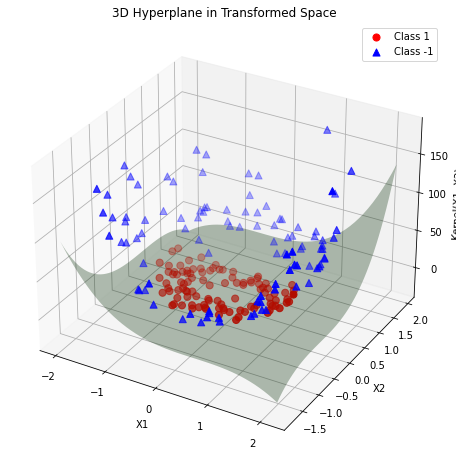

In [79]:
plot_3d_hyperplane(X, y, polynomial_kernel)